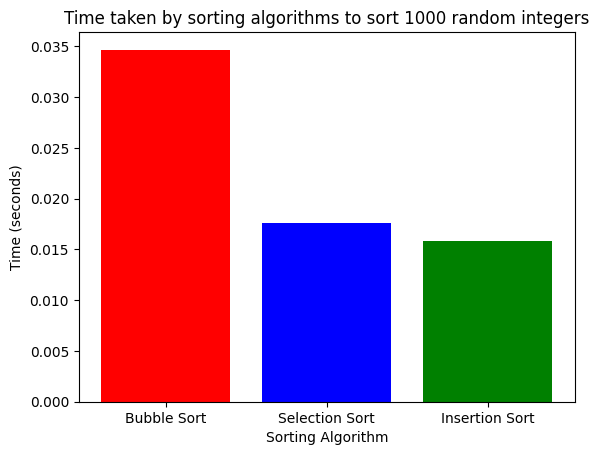

In [2]:
import random
import timeit
import matplotlib.pyplot as plt

# Function to generate 1000 random integers between 1 and 10000
def generate_random_numbers():
    return [random.randint(1, 10000) for _ in range(1000)]

# Sorting algorithms
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Timing function for sorting algorithms
def time_sorting_algorithm(algorithm, numbers):
    start_time = timeit.default_timer()
    algorithm(numbers)
    end_time = timeit.default_timer()
    return end_time - start_time

# Main function
if __name__ == "__main__":
    algorithms = [bubble_sort, selection_sort, insertion_sort]
    algorithm_names = ['Bubble Sort', 'Selection Sort', 'Insertion Sort']
    timings = []

    random_numbers = generate_random_numbers()

    for algorithm in algorithms:
        numbers = random_numbers.copy()
        timing = time_sorting_algorithm(algorithm, numbers)
        timings.append(timing)

    # Plotting
    plt.bar(algorithm_names, timings, color=['red', 'blue', 'green'])
    plt.xlabel('Sorting Algorithm')
    plt.ylabel('Time (seconds)')
    plt.title('Time taken by sorting algorithms to sort 1000 random integers')
    plt.show()

In [3]:
def merge_sorted_lists(lists):
  """Merges multiple sorted lists into a single sorted list.

  Args:
    lists: A list of sorted lists.

  Returns:
    A single sorted list containing all the elements from the input lists.
  """

  merged_list = []
  while any(lists):
    smallest_element = min(list[0] for list in lists if list)
    merged_list.append(smallest_element)
    for i, lst in enumerate(lists):
      if lst and lst[0] == smallest_element:
        del lst[0]
        break
  return merged_list

# Example usage
lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33],
]

merged_list = merge_sorted_lists(lists)
print(merged_list)

[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


In [4]:
import heapq

def find_k_largest_elements(arr, k):
    # Use min-heap with negative values to simulate a max-heap
    min_heap = []
    
    # Push the first K elements into the heap
    for num in arr[:k]:
        heapq.heappush(min_heap, num)
    
    # For the remaining elements, if any element is larger than the smallest element in the heap,
    # replace the smallest element with the current element
    for num in arr[k:]:
        if num > min_heap[0]:
            heapq.heappop(min_heap)
            heapq.heappush(min_heap, num)
    
    # The heap will contain the K largest elements in sorted order (largest to smallest)
    return sorted(min_heap, reverse=True)

# Example usage:
arr = [3, 10, 4, 7, 8, 20]
k = 3
result = find_k_largest_elements(arr, k)
print("K largest elements:", result)

K largest elements: [20, 10, 8]


In [5]:
def select_activities(activities):
  """
  Finds the maximum number of activities that can be done by a single person from a given set of activities.

  Args:
    activities: A list of tuples, where each tuple consists of the start and end time of an activity.

  Returns:
    A list of tuples representing the selected activities.
  """
  # Sort activities by finish time
  activities.sort(key=lambda activity: activity[1])

  selected_activities = []
  # Add the first activity to the result as it will always be included
  selected_activities.append(activities[0])
  last_finish_time = activities[0][1]

  for activity in activities[1:]:
    if activity[0] >= last_finish_time:
      selected_activities.append(activity)
      last_finish_time = activity[1]

  return selected_activities

# Sample activities
activities = [(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6, 10), (8, 11),
              (8, 12), (2, 13), (12, 14)]

# Select activities
selected_activities = select_activities(activities.copy())

# Print selected activities
print("Selected activities:")
for activity in selected_activities:
  print(activity)

Selected activities:
(1, 4)
(5, 7)
(8, 11)
(12, 14)


In [6]:
def merge_intervals(intervals):
  """
  Merges overlapping intervals and returns a list of non-overlapping intervals.

  Args:
    intervals: A list of tuples representing intervals.

  Returns:
    A list of tuples representing non-overlapping intervals.
  """
  # Sort intervals by start time
  intervals.sort(key=lambda interval: interval[0])

  merged_intervals = []
  current_interval = intervals[0]

  for interval in intervals[1:]:
    # If the current interval overlaps with the next interval
    if current_interval[1] >= interval[0]:
      # Merge the intervals by taking the max end time
      current_interval = (current_interval[0], max(current_interval[1], interval[1]))
    else:
      # No overlap, add the current interval to the result and start a new one
      merged_intervals.append(current_interval)
      current_interval = interval

  # Add the last interval
  merged_intervals.append(current_interval)

  return merged_intervals

# Sample intervals
intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]

# Merge intervals
merged_intervals = merge_intervals(intervals.copy())

# Print merged intervals
print("Merged intervals:")
for interval in merged_intervals:
  print(interval)

Merged intervals:
(1, 5)
(6, 9)
